### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve

# Klasifikasi Random Forest

**dataset 1 (lipinsky)**

In [12]:
df_PDL1 = pd.read_csv('/content/label2class_PD-L1.csv')
df_PDL1

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.525,3.87032,2,5,7.017729
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.660,5.62082,2,6,8.602060
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.608,6.50462,1,5,8.657577
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.108,7.88804,4,12,8.522879
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.004,9.65564,2,10,8.420216
...,...,...,...,...,...,...,...,...
1015,CHEMBL4776700,active,Cn1cnc(S(=O)(=O)N2CCCC3=C[C@H]4C[C@H](CN5CCCC[...,376.526,2.00380,0,5,9.000000
1016,CHEMBL5171101,active,CCCC[C@H]1C(=O)N(C)[C@@H](CCCC)C(=O)N[C@@H](C)...,1866.139,-3.56110,19,23,8.987163
1017,CHEMBL5411746,inactive,CC(C)OC(=O)[C@@H](Cn1ccnc1)NC(=O)C1CCCN(C(=O)c...,488.588,3.53890,1,6,7.200659
1018,CHEMBL5398154,active,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN3CCCC[C@H]3C(=...,753.340,7.71322,2,9,9.318759


**Melakukan transformasi class menjadi numeric ordinal**

In [13]:
# Mapping kelas kategori (class) ke nilai numerik (0,1)
mapping = {'active': 0, 'inactive': 1}
df_PDL1['class_numeric'] = df_PDL1['class'].map(mapping)

df_PDL1

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.525,3.87032,2,5,7.017729,1
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.660,5.62082,2,6,8.602060,0
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.608,6.50462,1,5,8.657577,0
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.108,7.88804,4,12,8.522879,0
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.004,9.65564,2,10,8.420216,0
...,...,...,...,...,...,...,...,...,...
1015,CHEMBL4776700,active,Cn1cnc(S(=O)(=O)N2CCCC3=C[C@H]4C[C@H](CN5CCCC[...,376.526,2.00380,0,5,9.000000,0
1016,CHEMBL5171101,active,CCCC[C@H]1C(=O)N(C)[C@@H](CCCC)C(=O)N[C@@H](C)...,1866.139,-3.56110,19,23,8.987163,0
1017,CHEMBL5411746,inactive,CC(C)OC(=O)[C@@H](Cn1ccnc1)NC(=O)C1CCCN(C(=O)c...,488.588,3.53890,1,6,7.200659,1
1018,CHEMBL5398154,active,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN3CCCC[C@H]3C(=...,753.340,7.71322,2,9,9.318759,0


**dataset 2 (finger print)**

In [14]:
df_fp = pd.read_csv('/content/dataset_model_PD-L1.csv')
df_fp = df_fp.drop(columns='pIC50')
df_fp

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,MW,LogP,NumHDonors,NumHAcceptors
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,419.525,3.87032,2,5
1,1,1,1,0,0,0,0,0,1,1,...,0,1,1,1,0,0,534.660,5.62082,2,6
2,0,0,0,0,0,0,0,0,1,1,...,0,1,1,1,0,0,477.608,6.50462,1,5
3,1,1,1,1,0,0,0,0,1,1,...,0,1,1,1,0,0,915.108,7.88804,4,12
4,1,1,1,1,0,0,0,0,1,1,...,0,1,1,1,0,0,801.004,9.65564,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,1,1,1,1,0,0,0,1,1,...,0,1,1,1,0,0,376.526,2.00380,0,5
1016,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,1866.139,-3.56110,19,23
1017,1,1,1,1,1,0,0,0,1,1,...,0,1,1,1,0,0,488.588,3.53890,1,6
1018,0,1,1,1,0,1,1,1,1,1,...,0,0,0,0,1,0,753.340,7.71322,2,9


**dataset 3 (combined)**

In [15]:
df = pd.concat([df_PDL1,df_fp], axis=1)
df.head()

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric,0,...,175,176,177,178,179,180,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.525,3.87032,2,5,7.017729,1,0,...,0,0,1,0,0,0,419.525,3.87032,2,5
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.660,5.62082,2,6,8.602060,0,1,...,0,1,1,1,0,0,534.660,5.62082,2,6
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.608,6.50462,1,5,8.657577,0,0,...,0,1,1,1,0,0,477.608,6.50462,1,5
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.108,7.88804,4,12,8.522879,0,1,...,0,1,1,1,0,0,915.108,7.88804,4,12
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.004,9.65564,2,10,8.420216,0,1,...,0,1,1,1,0,0,801.004,9.65564,2,10


In [16]:
X = df.drop(columns=['molecule_chembl_id', 'canonical_smiles', 'class', 'class_numeric', 'MW','LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']) # Changed 'class numeric' to 'class_numeric'
X = X.astype(float)
X

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1016,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1018,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
y = df['class_numeric']
y

,class_numeric
0,1
1,0
2,0
3,0
4,0
...,...
1015,0
1016,0
1017,1
1018,0


In [18]:
y.value_counts()

,count
class_numeric,
1,846
0,174


In [19]:
X.shape, y.shape

((1020, 181), (1020,))

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [21]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1688,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1689,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1690,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [22]:
y_resampled.value_counts()

,count
class_numeric,
1,846
0,846


### Split Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1353, 181), (339, 181), (1353,), (339,))

* X_train: (1353, 181) -> Fitur training
* y_train: (1353,) -> Target training
* X_test: (339, 181) -> Fitur testing
* y_test: (339,) -> Target testing

### Random forest (tanpa pipeline)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
accuracy = rfc.score(X_test, y_test)
print(accuracy)

0.9321533923303835


### Pipeline

In [26]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric = []
categoric = [col for col in X_train.columns if col not in numeric]

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numeric),
    ("categoric", categorical_pipeline,categoric)
])


In [27]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  []),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['0', '1', '2', '3', '4', '5',
                                                   '6', '7', '8', '9', '10',
                                                   '11', '12', '13', '14', '15',
                                                   '16', '17', '18', '19', '20',
                                                   '21', '22', '23', '24', '25',
                                                   '26', '27', '28', '29', ...])])),
                ('classifier', RandomForestClassifier())])

### Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [5, 10, 15, 20],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
}

model = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)
model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         []),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['0',
                                                                          '1'...
                                                                          '4',
                                                                          '5',
                                                                          '6',
                                                                          '7',
                                                                          '8',
                                                                          '9',
                                                                          '10',
                                                                          '11',
                                                                          '12',
                                                                          '13',
                                                                          '14',
                                                                          '15',
                                                                          '16',
                                                                          '17',
                                                                          '18',
                                                                          '19',
                                                                          '20',
                                                                          '21',
                                                                          '22',
                                                                          '23',
                                                                          '24',
                                                                          '25',
                                                                          '26',
                                                                          '27',
                                                                          '28',
                                                                          '29', ...])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [5, 10, 15, 20]},
             return_train_score=True, verbose=1)

In [30]:
# evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 15}
0.9889135254988913 0.9349624162908295 0.9351032448377581


**Parameter terpilih :**


*   n estimator : 15
*   minimal sampel split : 2
*   Kedalaman : none

### Predict

In [31]:
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

In [32]:
y_pred_best = model.predict(X_test)
y_pred_best_proba = model.predict_proba(X_test)[:, 1]

In [33]:
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       153
           1       0.99      0.89      0.94       186

    accuracy                           0.94       339
   macro avg       0.94      0.94      0.93       339
weighted avg       0.94      0.94      0.94       339



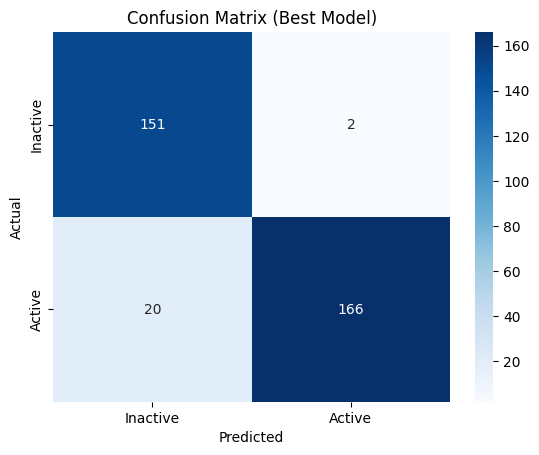

In [34]:
# Confusion Matrix untuk model terbaik
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()

In [35]:
# ROC-AUC untuk model terbaik
roc_auc_best = roc_auc_score(y_test, y_pred_best_proba)
print("\nROC-AUC Score (Best Model):", roc_auc_best)


ROC-AUC Score (Best Model): 0.9825005270925573


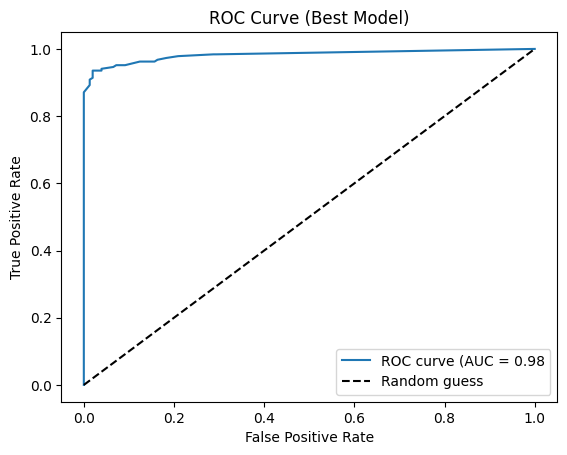

In [36]:
# plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_best:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Best Model)')
plt.legend()
plt.show()

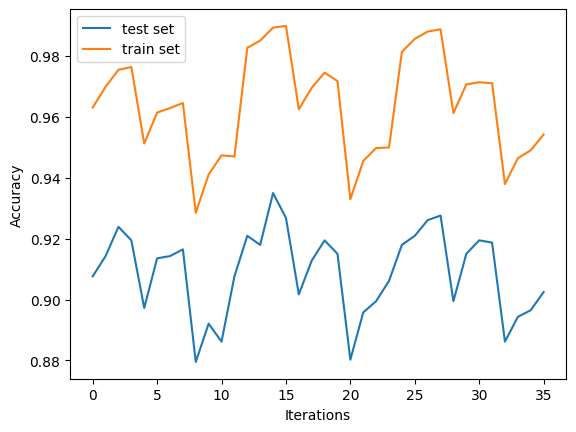

In [37]:
plt.plot(model.cv_results_['mean_test_score'])
plt.plot(model.cv_results_['mean_train_score'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['test set', 'train set'], loc='upper left')
plt.show()

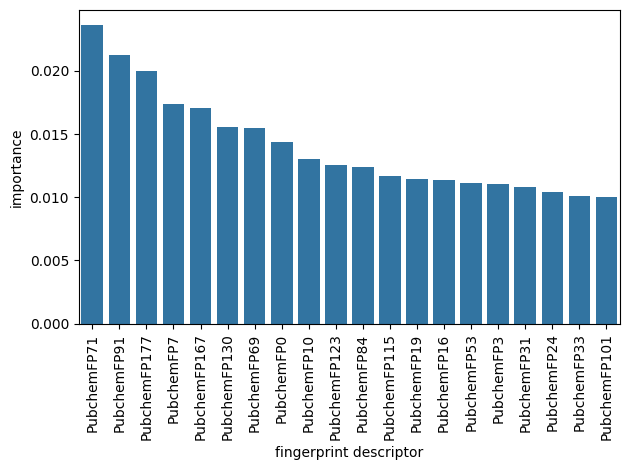

In [38]:
# get importance with Random Forest
importance = model.best_estimator_.named_steps['classifier'].feature_importances_
fp = sorted(range(len(importance)), key=lambda i: importance[i], reverse=True)[:20]
imp_values = sorted(importance, reverse=True)[:20]
fp = ['PubchemFP'+str(i) for i in fp]
imp_values
fake = pd.DataFrame({'ind': fp, 'importance__': imp_values})
ax = sns.barplot(x = 'ind', y = 'importance__', data = fake)
ax.set(xlabel='fingerprint descriptor', ylabel='importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Lazy Predict

In [41]:
!pip install lazypredict

  Using cached lazypredict-0.2.13-py2.py3-none-any.whl.metadata (12 kB)
Using cached lazypredict-0.2.13-py2.py3-none-any.whl (12 kB)


In [42]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = reg.fit(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 42/42 [00:52<00:00,  1.25s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 1353, number of used features: 181
[LightGBM] [Info] Start training from score 0.487805


In [43]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.52,0.78,0.23,2.01
BaggingRegressor,0.50,0.77,0.24,0.52
HistGradientBoostingRegressor,0.40,0.72,0.26,1.26
SVR,0.35,0.70,0.27,0.41
MLPRegressor,0.35,0.70,0.27,1.66
LGBMRegressor,0.35,0.70,0.27,0.30
ExtraTreesRegressor,0.30,0.68,0.28,5.99
ExtraTreeRegressor,0.30,0.67,0.28,0.34
DecisionTreeRegressor,0.28,0.67,0.29,0.13


In [44]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.52,0.78,0.23,2.01
BaggingRegressor,0.50,0.77,0.24,0.52
HistGradientBoostingRegressor,0.40,0.72,0.26,1.26
SVR,0.35,0.70,0.27,0.41
MLPRegressor,0.35,0.70,0.27,1.66
LGBMRegressor,0.35,0.70,0.27,0.30
ExtraTreesRegressor,0.30,0.68,0.28,5.99
ExtraTreeRegressor,0.30,0.67,0.28,0.34
DecisionTreeRegressor,0.28,0.67,0.29,0.13


[(0.0, 1.0)]

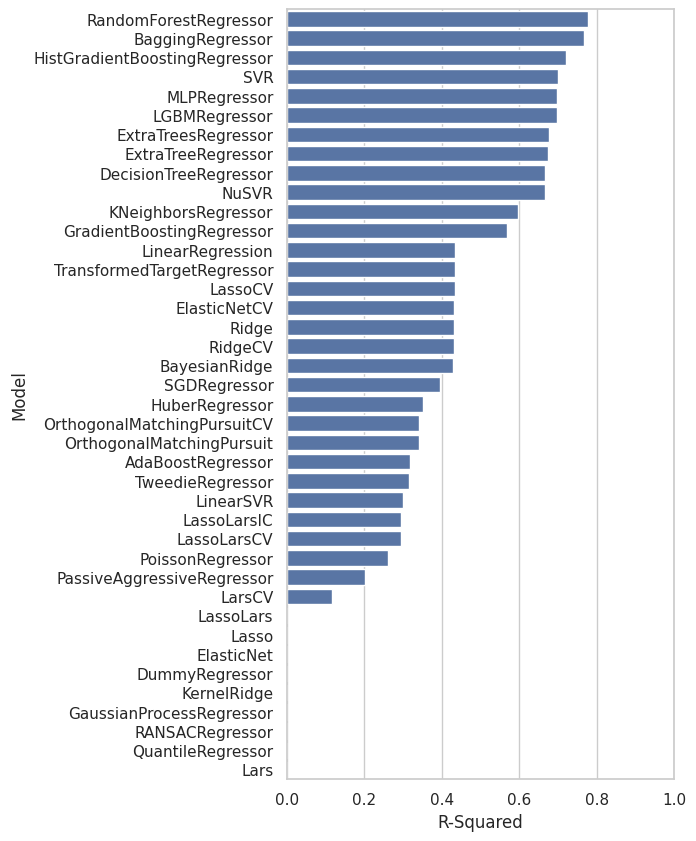

In [45]:
# Bar plot of R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))
#plt.savefig('plot_benchmark_RSquared.png', dpi=800)

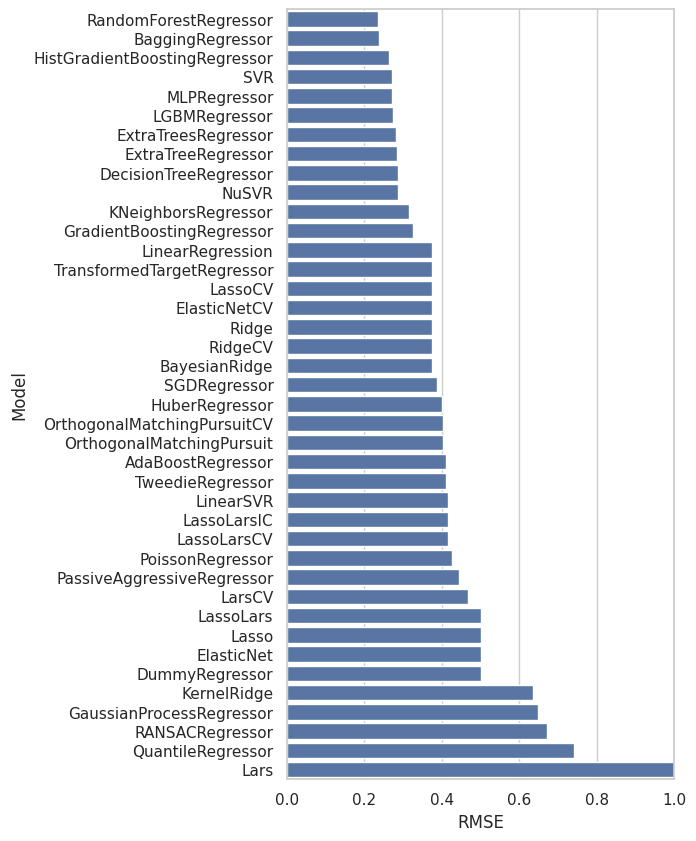

In [46]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 1))
plt.savefig('plot_benchmark_RMSE.png', dpi=600) # Corrected line

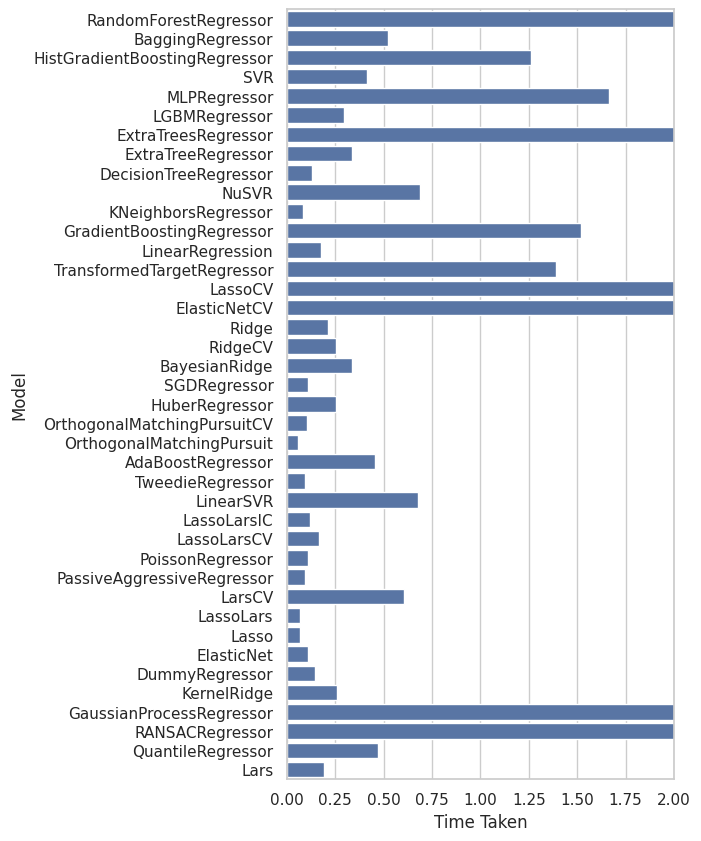

In [47]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 2))
plt.savefig('plot_benchmark_calculation_time.pdf')